## 2차 과제

- 주제: 데이터 크롤링을 활용한 뉴스 & 리뷰 데이터 분석
- 데이터: 자유롭게 크롤링
- 사용 라이브러리: selenium, beautifulsoup, etc.

### 1. 뉴스 기사 데이터 크롤링

1.1 원하는 뉴스 기사의 본문을 크롤링하시오.

In [1]:
# %pip install requests
# %pip install beautifulsoup4
# %pip install nltk
# %pip install wordcloud

# nltk.download('punkt')
# nltk.download('stopwords')

In [2]:
import pandas as pd

import requests
from bs4 import BeautifulSoup

import nltk
from nltk.corpus import stopwords
from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
url = 'https://n.news.naver.com/article/087/0001032095?cds=news_media_pc&type=breakingnews'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# 본문 내용추출
article_body = soup.find('div', class_='newsct_article _article_body') 
article_text = article_body.text.strip() 

print(article_text)

어제 하루에 의대생 771명 신청…최근 사흘간 1천380명 늘어의대 증원 배정위 오늘 가동…지방국립대 정원 200명으로 늘듯



◇정부의 의대 증원 정책에 반발해 휴학계를 제출한 의대생들의 '집단 유급 마지노선'이 다가오고 있는 14일 한 의과대학 강의실이 의대생 집단휴학으로 개강이 미뤄지며 썰렁한 모습을 보이고 있다. 사진=연합뉴스속보=정부의 의대 증원 정책에 반발해 휴학계를 제출한 의대생들의 '집단 유급'이 현실로 다가온 가운데, 어제 하루에만 의대생 771명이 '유효 휴학'을 신청한 것으로 나타났다.교육부에 따르면 전날 하루 전국 40개 의대를 대상으로 조사한 결과 '유효 휴학 신청' 건수는 8개교, 771명이다.기존에 낸 휴학계를 철회한 학생은 2개교에서 4명 발생했다.이로써 유효 휴학 신청 건수는 누적 6천822건으로 7천건에 육박했다. 지난해 4월 기준 전국 의대 재학생(1만8천793명)의 36.3% 수준이다.유효 휴학 신청은 학부모 동의, 학과장 서명 등 학칙에 따른 절차를 지켜 제출된 휴학계다.교육부는 지난달까지 단순히 휴학계 제출을 모두 집계했다. 이렇게 휴학계를 제출한 의대생은 총 1만3천697명(중복 포함)에 달했다.하지만 이달부터는 유효 휴학 신청만을 집계하고 있다. 절차를 지키지 않은 휴학의 경우 이를 반려해달라고 각 대학에 요청했으므로 의미가 없다고 봐서다.유효 휴학 신청은 이달 내내 하루 기준 한두 자릿수로 증가하다가 12일 511명, 13일 98명에 이어 전날까지 사흘 연속 큰 증가세를 보였다. 사흘 사이 1천380명이 유효 휴학계를 집중적으로 제출한 셈이다.의대생 유효 휴학 신청이 갑자기 증가한 것은 의대생들이 '동맹휴학'을 관철하겠다고 결의한 결과로 보인다.대한의과대학 의학전문대학원 학생협회(의대협)는 지난 9일 임시총회에서 '가장 먼저 휴학계가 수리되는 학교의 날짜에 맞춰 40개 모든 단위가 학교 측에 휴학계 수리를 요청한다'는 안건을 만장일치로 의결했다.



◇한 의과대학 강의실이 의대생 집단휴학으로 개강이 미뤄지며 썰렁

1.2 크롤링한 본문을 단어 단위로 나누고 각 단어가 나온 횟수와 함께 dataframe 형식으로 변환하시오.

In [4]:
# 단어 단위로 토큰화
words = nltk.word_tokenize(article_text)

# 단어들의 나온 횟수 계산
word_counts = Counter(words)

# dataframe 형식으로 변환
df_word_counts = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])

print(df_word_counts)

      Word  Count
0       어제      2
1      하루에      1
2      의대생      4
3     771명      1
4    신청…최근      1
..     ...    ...
525   목소리가      1
526  컸다.이들      1
527    의대의      1
528   100명      1
529    전망이      1

[530 rows x 2 columns]


1.3 불용어를 제거하시오.

In [5]:
# 불용어 리스트 불러오기 및 추가
stop_words = stopwords.words("english")
stop_words.append('(')
stop_words.append(')')
stop_words.append(',')
stop_words.append('.')
stop_words.append('\'')
stop_words.append('\"')
stop_words.append('%')
stop_words.append('◇')

# article_text 토큰화
words = nltk.word_tokenize(article_text)

# 불용어 제거
del_stopwords = [word for word in words if word.lower() not in stop_words]

# 제거된 단어들의 나온 횟수 계산 및 DataFrame으로 변환
word_counts = Counter(del_stopwords)
df_word_counts = pd.DataFrame(word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

print(df_word_counts)


       Word  Count
16       의대     16
46       휴학      8
365    비수도권      7
262     정원이      6
8        증원      6
..      ...    ...
222  있다.대부분      1
220      처할      1
219     유급에      1
218      집단      1
523     전망이      1

[524 rows x 2 columns]


1.4 처리한 데이터를 워드아트로 변환해 어떤 단어가 가장 많이 나왔는지 확인하시오(폰트, 색 등 자유).

플레이스토어 댓글부분에서도 워드아트로 변환하기 위해 함수로 만듬

In [6]:
def generate_wordcloud(word_freq):
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', 
                          width=500, height=500, 
                          background_color='white', 
                          min_font_size=5).generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

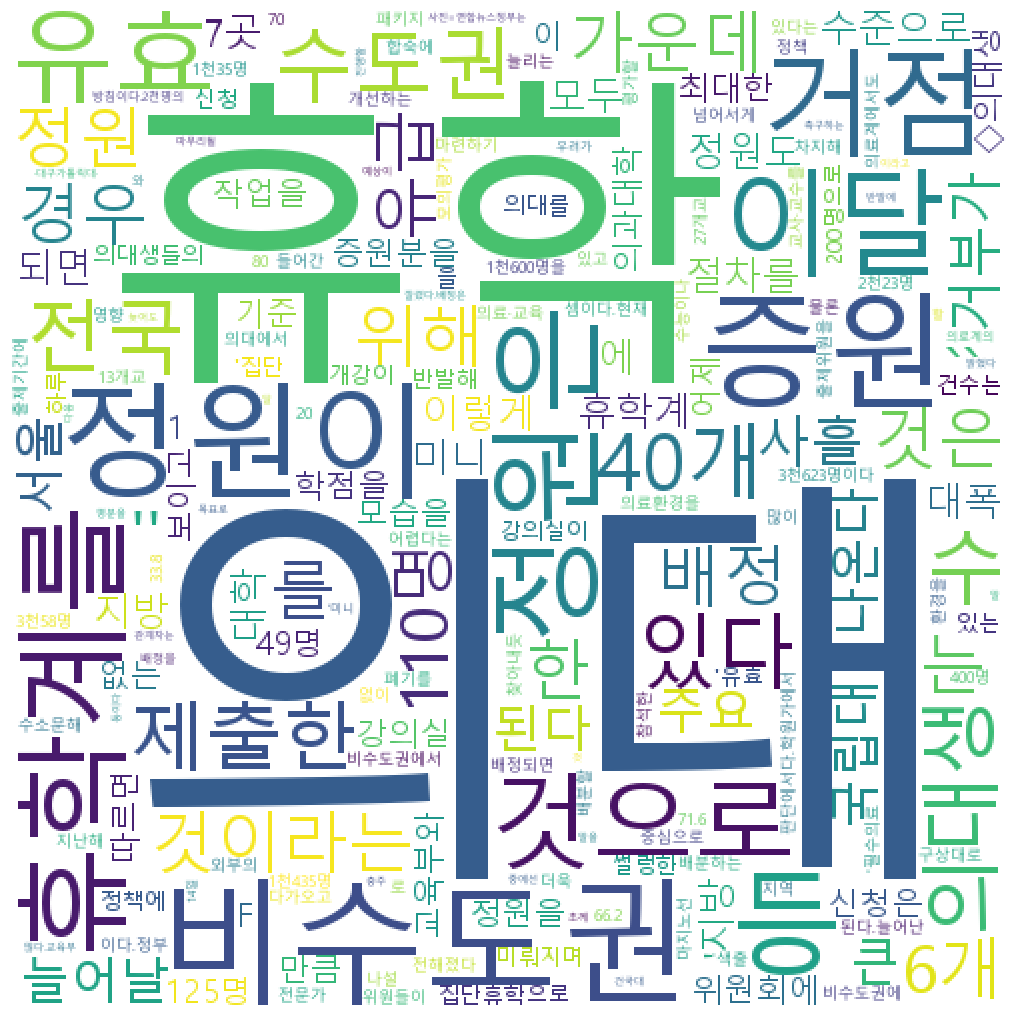

In [7]:
news_word = dict(zip(df_word_counts['Word'], df_word_counts['Count']))
generate_wordcloud(news_word)

### 2. 플레이스토어 리뷰 데이터 크롤링(동적 크롤링)

2.1 100개 이상의 리뷰를 가진 앱에 있는 댓글 리뷰를 크롤링하시오.

In [8]:
# %pip install google_play_scraper

In [9]:
from google_play_scraper import app

app_txt = app(
    'com.nexon.bluearchive',
    lang='ko',
    country='kr' 
)

In [10]:
print("app : " + app_txt['title'])
print("summary : " +  app_txt['summary'])

app : 블루 아카이브
summary : 마음 속 담고 싶은 이야기 청춘X학원X밀리터리 RPG "블루 아카이브"


In [15]:
from google_play_scraper import reviews_all

result = reviews_all(
    'com.nexon.bluearchive',
    lang='ko', 
    country='kr', 
)

2.2 크롤링한 데이터를 dataframe 형태로 변환하시오(날짜, 별점, 리뷰 유저 등).

In [16]:
import pandas as pd
df = pd.DataFrame(result)

df = df[['at','score', 'content']]
df.columns = ['날짜','별점', '리뷰']
df

,날짜,별점,리뷰
0,2024-03-16 18:36:42,5,군대에서 시작하고 접었으나 23년 1월에 제대이후 다시시작하니 베스트 게임이됨. 스...
1,2024-03-16 10:34:42,5,지들이 못뽑은거랑 지들 폰 구린거 가지고 여기서 떼쓰면 어쩌노 꼬우면 비틱해라 천장...
2,2024-03-15 18:27:19,5,재밌는.
3,2024-03-15 17:43:27,5,용하신이시여 나에게 비틱을
4,2024-03-15 08:17:47,5,걍 인생 게임임 스토리보고 감동 받은 게임임 항상 응원하고 더 발전했음 좋겠음 개발...
...,...,...,...
791,2023-09-03 00:56:39,2,N슨에서 만든 게임중 가장 괜찮음. 하지만 레벨 20부터 성장 가능성이 안보이내요....
792,2023-09-02 23:38:34,3,귀요미
793,2023-09-02 03:33:27,5,세상에서 가장 재미있는 게임♡
794,2023-09-01 18:26:22,5,용하 당신은 신이야


2.3 긍정 리뷰와 부정 리뷰를 나누시오(기준은 자유).

In [17]:
positive_review = df[df['별점'] > 3]
negative_review = df[df['별점'] < 3]

print("## 긍정 리뷰\n")
print(positive_review)
print("\n\n ## 부정 리뷰\n")
print(negative_review)

## 긍정 리뷰

                     날짜  별점                                                 리뷰
0   2024-03-16 18:36:42   5  군대에서 시작하고 접었으나 23년 1월에 제대이후 다시시작하니 베스트 게임이됨. 스...
1   2024-03-16 10:34:42   5  지들이 못뽑은거랑 지들 폰 구린거 가지고 여기서 떼쓰면 어쩌노 꼬우면 비틱해라 천장...
2   2024-03-15 18:27:19   5                                               재밌는.
3   2024-03-15 17:43:27   5                                     용하신이시여 나에게 비틱을
4   2024-03-15 08:17:47   5  걍 인생 게임임 스토리보고 감동 받은 게임임 항상 응원하고 더 발전했음 좋겠음 개발...
..                  ...  ..                                                ...
788 2023-09-04 08:18:03   5  총력전이 너무 경쟁이 심해 피튀기는거 말곤 느긋하게 겜 할수 있어 좋네요. 경쟁 생...
790 2023-09-03 19:23:37   5                                 게임이 왠지 모르게 정이 많이 감
793 2023-09-02 03:33:27   5                                   세상에서 가장 재미있는 게임♡
794 2023-09-01 18:26:22   5                                         용하 당신은 신이야
795 2023-08-31 12:04:56   5                                사장님이 빡빡이고 캐릭터가 맛있어요

[668 rows x 3 columns]


 ## 부정 리뷰

     

### 3. 자유 분석

3.1 위에서 크롤링한 데이터들을 활용해 자유롭게 인사이트를 도출하시오.

In [36]:
# %pip install konlpy

konlpy 라이브러리 사용하는 과정에 있어 java 설치되어 있어야 합니다

In [18]:
from konlpy.tag import Okt
from collections import Counter

## 긍정 리뷰의 워드 클라우드



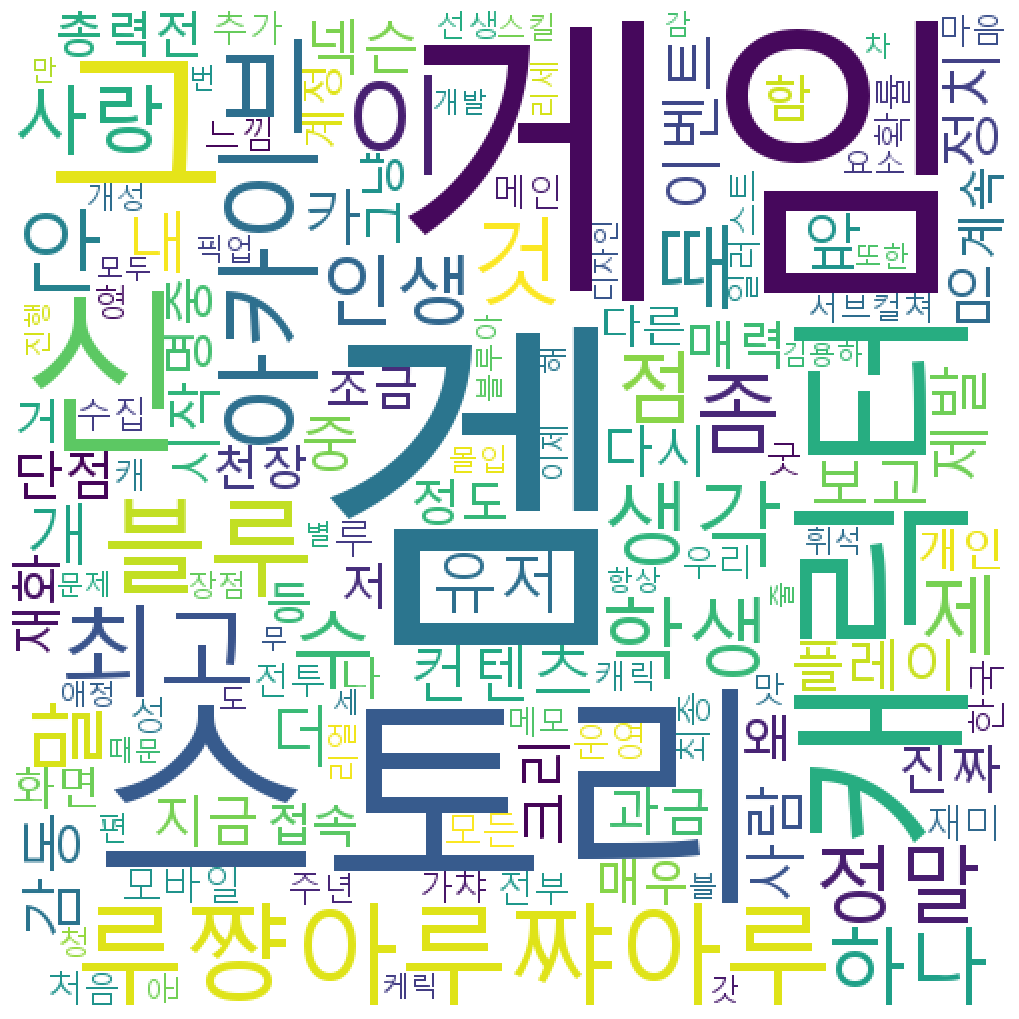

In [37]:
#  reviews -> positive_review 에 대해서 분석
reviews = positive_review

# 형태소 분석기
okt = Okt()

# 모든 리뷰를 하나의 리스트로 변환
words = []
for review in reviews['리뷰']:
    words.extend(okt.nouns(review))

# 단어 빈도수 계산
word_counts = Counter(words)

# 빈도수가 7 이상인 단어만 필터링
filtered_word_counts = {word: count for word, count in word_counts.items() if count > 7}

# 워드 클라우드 생성
print("## 긍정 리뷰의 워드 클라우드\n")
generate_wordcloud(filtered_word_counts)


In [38]:
# 출력 옵션을 설정
pd.set_option('display.max_rows', None)

In [39]:
df_word_counts = pd.DataFrame(filtered_word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

print(df_word_counts)

        Word  Count
33         겜    357
2         게임    259
3        스토리    139
40       캐릭터     87
65         그     85
17         신     78
135  루쨩아루쨔아루     55
25        블루     52
26      아카이브     52
42         이     52
31        최고     44
73         것     41
64        생각     39
53         안     37
70         때     36
38         좀     36
20        학생     35
63         수     35
32         제     34
83        정말     34
81        하나     33
94         점     31
75         말     30
9         인생     30
21        사랑     29
56        유저     21
35         내     21
14         더     21
98         개     21
12        감동     20
54       컨텐츠     19
67         앞     19
100      이벤트     18
105       제발     18
132       정치     18
68        사람     18
5          중     18
11        보고     18
10         임     18
18         카     17
133       크리     17
27        넥슨     17
44       플레이     17
1         다시     16
57        단점     16
84        진짜     16
0         시작     16
119       과금     16
127       재화     16



## 부정 리뷰의 워드 클라우드



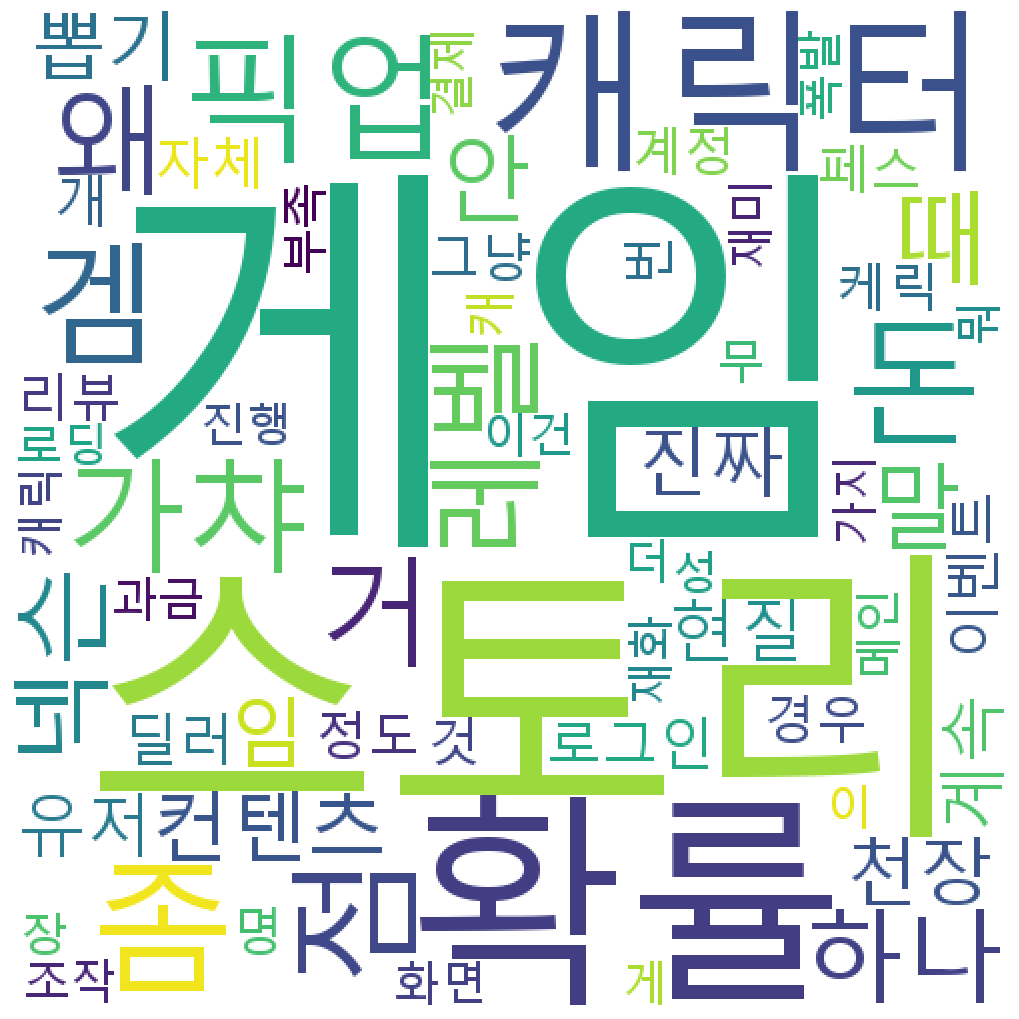

In [40]:
#  reviews -> negative_review 에 대해서 분석
reviews = negative_review

# 형태소 분석기
okt = Okt()

# 모든 리뷰를 하나의 리스트로 변환
words = []
for review in reviews['리뷰']:
    words.extend(okt.nouns(review))

# 단어 빈도수 계산
word_counts = Counter(words)

# 빈도수가 3 이상인 단어만 필터링
filtered_word_counts = {word: count for word, count in word_counts.items() if count > 3}

# 워드 클라우드 생성
print("\n## 부정 리뷰의 워드 클라우드\n")
generate_wordcloud(filtered_word_counts)


In [41]:
df_word_counts = pd.DataFrame(filtered_word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

print(df_word_counts)

   Word  Count
17   게임     41
28   확률     21
0   스토리     21
11  캐릭터     18
13    좀     12
27   픽업     11
38    점     11
29    돈     11
24    겜     10
39   가챠     10
44   넥슨      9
42   하나      9
19    왜      9
20    거      9
50    때      9
7    레벨      9
52    임      8
34  컨텐츠      8
32    말      8
3     안      8
36   뽑기      7
16   진짜      7
48   천장      7
43    개      6
45  이벤트      6
12   계속      6
2    현질      6
8    유저      6
54   자체      6
57   딜러      6
18  로그인      6
59   그냥      5
40   케릭      5
37    명      5
31   페스      5
62   리뷰      5
30   경우      5
26   계정      5
25    것      5
4    정도      5
6     캐      5
14    번      5
51   가지      4
61    성      4
60   부족      4
58   재화      4
5     이      4
56   캐릭      4
55   폭발      4
53   재미      4
9    진행      4
35    뭐      4
10   메인      4
33   조작      4
47   과금      4
46    무      4
15    더      4
21   화면      4
22   로딩      4
23    게      4
41   이건      4
1     장      4
49   결제      4


In [31]:
# 출력 옵션을 원래대로
pd.reset_option('display.max_rows')

긍정리뷰와 부정리뷰의 단어출력 내용을 보면  

긍정리뷰의 경우 : 신, 인생, 등등의 긍정단어  
부정리뷰의 경우 : 돈, 가챠, 뽑기, 현질  

이런류의 단어가 차아니게 출력되는것을 볼수있습니다

긍정리뷰를 통해서 유의미한 인사이트를 도출할수는 없었고  
부정리뷰에서는 유로서비스적인 측면의 뽑기상품에서 부정적인 의견이 많음을 확인할수 있었습니다

유로서비스의 뽑기상품에 대한 확률공개등의 보완사항이 들어간다면  
긍정리뷰의 비율이 높아질것으로 기대

.